In [53]:
# Install Required Libraries
!pip install numpy pandas matplotlib seaborn scikit-learn

In [54]:
# 1. Data Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [55]:
# Load Dataset with specified encoding
#For textual data we have to specify the encoding because sometime it creates problem
data = pd.read_csv('spam.csv', encoding='latin1')
df = pd.DataFrame(data)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [56]:
#Removing unwanted/non-useful columns
df.drop(['Unnamed: 2', 'Unnamed: 3',	'Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
#Correcting the column names
df.rename(columns={'v1': 'Label', 'v2': 'Message'}, inplace=True)
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
# Encode labels (ham = 0, spam = 1)
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})
df.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<ipython-input-59-74fb1f358f9d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Label_counts.index, y=Label_counts.values, palette='viridis')


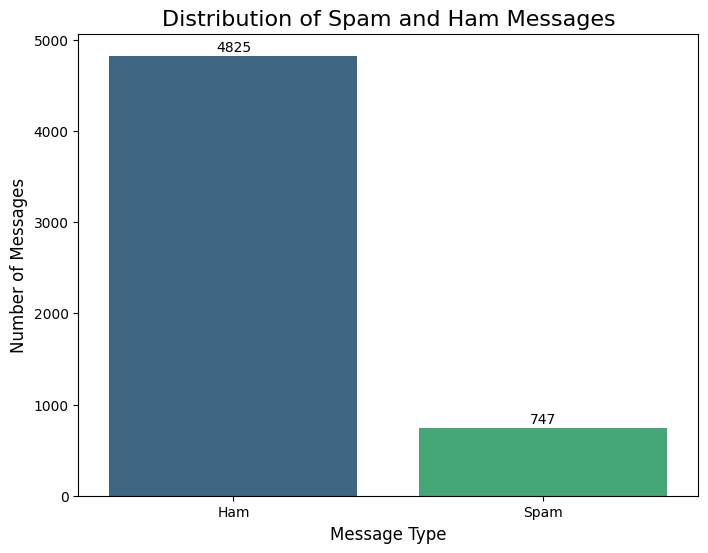

In [59]:
#Visualizing the spam and ham distribution over dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each category in 'Label'
Label_counts = df['Label'].value_counts()

# Plot the distribution using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=Label_counts.index, y=Label_counts.values, palette='viridis')

# Add proper labeling
plt.title('Distribution of Spam and Ham Messages', fontsize=16)
plt.xlabel('Message Type', fontsize=12)
plt.ylabel('Number of Messages', fontsize=12)

# Annotate the bar plot with the counts
for i, count in enumerate(Label_counts.values):
    plt.text(i, count + 50, str(count), ha='center', fontsize=10)

plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'], fontsize=10)
plt.show()


In [60]:
#concise summary of a DataFrame using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   int64 
 1   Message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [61]:
# Split the data
X = df['Message']  # Features (SMS messages)
y = df['Label']    # Labels (ham/spam)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
# Convert messages to a bag-of-words representation
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [63]:
# Train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_transformed, y_train)

# Predict on test data
y_pred = model.predict(X_test_transformed)

In [64]:
# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[963   2]
 [ 16 134]]
Accuracy: 0.9838565022421525


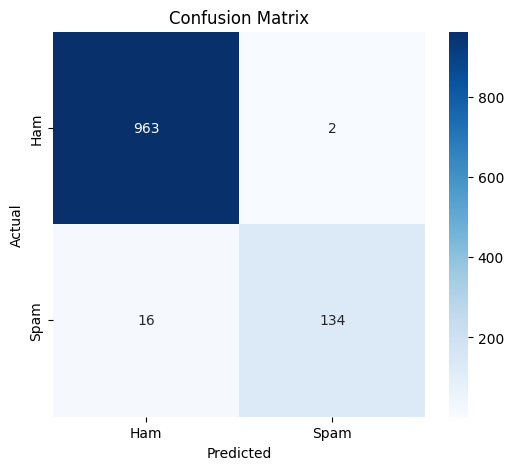

In [65]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [66]:
# User input prediction
def predict_sms(sms):
    """Predict if a given SMS is spam or ham."""
    sms_vectorized = vectorizer.transform([sms])  # Transform the input SMS
    prediction = model.predict(sms_vectorized)    # Get prediction
    return "Spam" if prediction[0] == 1 else "Ham"

# Interactive prediction
while True:
    user_input = input("Enter an SMS to check if it is Spam or Ham (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("Exiting the program. Goodbye!")
        break
    else:
        prediction = predict_sms(user_input)
        print(f"The SMS is classified as: {prediction}")

Enter an SMS to check if it is Spam or Ham (or type 'exit' to quit): Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
The SMS is classified as: Ham
Enter an SMS to check if it is Spam or Ham (or type 'exit' to quit): Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
The SMS is classified as: Spam
Enter an SMS to check if it is Spam or Ham (or type 'exit' to quit): exit
Exiting the program. Goodbye!
